In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import ydata_profiling as pf
import os , sys
import warnings 
warnings.filterwarnings("ignore")


**created by : Rajat Singh**

# **Data Ingestion**

In [2]:
file_path = os.path.join(os.getcwd() , r"dataset\googleplaystore.csv") #file path
#creating dataframe as df 
df=pd.read_csv(file_path) 
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **About Dataset**

**Context**

***While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many
counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found
out that the iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and
easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like
dynamic page load) using JQuery making scraping more challenging.***

**Content**

***Each app (row) has values for catergory, rating, size, and more.***

**Acknowledgements**

***This information is scraped from the Google Play Store. This app information would not be available
without it.***


**Google Play Store Dataset (googleplaystore.csv):**

**Contains details about various apps on the Google Play Store.**

**Key columns include:**

**App: Name of the app.**

**Category: The category of the app (e.g., ART_AND_DESIGN).**

**Rating: User rating of the app.**

**Reviews: Number of user reviews.**

**Size: Size of the app.**

**Installs: Number of installs**

**Type: Whether the app is free or paid.**

**Price: Price of the app.**

**Content Rating: The target age group for the app.**

**Genres: Genre of the app.**

**Last Updated: The last update date.**

**Current Ver: The current version of the app.**

**Android Ver: The minimum Android version required.**

**Google Play Store User Reviews Dataset (googleplaystore_user_reviews.csv):**

**Contains user reviews for the apps.**

**Key columns include:**

**App: Name of the app.**

**Translated_Review: The review text (translated).**

**Sentiment: The sentiment of the review (Positive, Neutral, Negative).**

**Sentiment_Polarity: A numeric representation of the sentiment.**

**Sentiment_Subjectivity: Degree to which the sentiment is subjective.**

In [3]:
#second dataset as df1
df1= pd.read_csv(r"dataset\googleplaystore_user_reviews.csv")
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
#Basic Analysis
print(df.shape)
print(df1.shape)

(10841, 13)
(64295, 5)


In [5]:
#checking column of each dataset , if there is any spaces are not 
print("dataframe 1 columns",df.columns) 
print("\ndataframe 2 columns" , df1.columns)

dataframe 1 columns Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

dataframe 2 columns Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [6]:
print(df.info()) #checking data types of each columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [7]:
df.describe() #only one column is numericals

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **Basic Observation using Automated Library**
**By using Sweeiviz analyzing each columns , after that manually perform EDA**

In [8]:
#lets use automated library for basic observation , i am sweetviz library
sweetviz_report = sv.analyze(df)
sweetviz_report.show_html() #for viewing html we need to install ipywidgets


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
df.isnull().sum()  #rating has more than 1000 null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
df.head() # lets convert these column into numericals , such as Rewiews , Size , installs Price and version 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df["Installs"].unique() #lets remove + from install 

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [12]:
# Function to handle the conversion
def convert_to_numeric(value):
    if value == 'Free':
        return 0
    else:
        # Remove commas and '+'
        value = value.replace(',', '').replace('+', '')
        return int(value)

# Apply the conversion
df["Installs"] = df["Installs"].apply(convert_to_numeric)

In [13]:
df["Installs"].unique() #its looking fine 

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [14]:
df["Installs"].isnull().sum() #no null values 

0

In [15]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
df["Price"].unique() #lets remove this dollar sign $ from Price column 


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

**for this i will remove $ sign , remove Everyone Label with 0**

In [17]:
df["Price"]= df["Price"].str.replace("$" , "")
df["Price"]= df["Price"].str.replace("Everyone" , "0")
df["Price"]=df["Price"].astype(float)
df["Price"].unique()
df.rename(columns={"Price":"Price($)"} , inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
df["Size"].unique() #checking unique values inside size column

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

# **cleaning Size column**

***Removing M and K Values and Converting each Values into Kb***

***For NaN values to 0***

In [19]:
# Function to convert sizes
def convert_size(size):
    if isinstance(size, str):
        size = size.upper()  # Ensure 'M' and 'K' are uppercase for consistency
        if "M" in size:
            return float(size.replace("M", "")) * 1000  # Convert MB to KB
        elif "K" in size:
            return float(size.replace("K", ""))  # Keep KB as is
        else:
            return np.nan  # Handle 'Varies with device' or other unexpected formats
    else:
        return np.nan  # Handle NaN or other non-string entries

# Apply the function to the 'Size' column
df["Size"] = df["Size"].apply(convert_size)
# Check the output
print(df["Size"].head(10))

        


0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
5     5600.0
6    19000.0
7    29000.0
8    33000.0
9     3100.0
Name: Size, dtype: float64


In [20]:
df["Size"].isnull().sum()
df["Size"]= df["Size"].replace(np.nan , df["Size"].mean()) #replacing null values with mean of Size column 
print(df["Size"].isnull().sum())
df.rename(columns={"Size":"Size(kb)"} , inplace=True)  #Changing column name in kb

0


In [21]:
df["Android Ver"].unique() #lets extract num and else be removed

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [22]:
# Function to convert version strings and keep only major.minor (e.g., '4.0.3' -> 4.0)
def convert_version(value):
    if pd.isna(value) or value == 'Varies with device':
        return np.nan  # Representing missing data
    elif 'and up' in value:
        version = value.split(' and up')[0].replace('W', '').strip()
    elif '-' in value:
        version = value.split('-')[0].replace('W', '').strip()
    else:
        version = value.replace('W', '').strip()

    # Split the version by '.' and take the major and minor parts (first two parts)
    version_parts = version.split('.')
    major_minor = '.'.join(version_parts[:2])  # Keep only major and minor parts
    
    return float(major_minor)  # Convert to float for numeric operations

# Apply the function to the 'Android Ver' column
df['Android Ver'] = df['Android Ver'].apply(convert_version)

# Check the output
print(df['Android Ver'].head())


0    4.0
1    4.0
2    4.0
3    4.2
4    4.4
Name: Android Ver, dtype: float64


In [23]:
df = df.dropna(subset=['Android Ver']) #droping nan values 
df.shape


(9476, 13)

In [24]:
df.isnull().sum()

App                  0
Category             0
Rating            1431
Reviews              0
Size(kb)             0
Installs             0
Type                 0
Price($)             0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

In [25]:
#lets handle this Null values inside Rating Column
df["Rating"]= df["Rating"].replace(np.nan , df["Rating"].mean())
df["Rating"].isnull().sum()


0

In [26]:
df["Current Ver"]

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10834                 1.0.0
10835                 1.1.5
10836                  1.48
10837                   1.0
10838                   1.0
Name: Current Ver, Length: 9476, dtype: object

In [27]:
import re
# Function to convert version strings and keep only major.minor (e.g., '1.2.4' -> 1.2)
def convert_version(value):
    if pd.isna(value) or value == 'Varies with device':
        return np.nan  # Representing missing data
    else:
        # Use regex to find the first valid version number with major.minor format
        match = re.match(r'(\d+\.\d+)', value)  # Extract only the first two numeric parts
        if match:
            return float(match.group(1))  # Convert to float for numeric operations
        else:
            return np.nan  # If no valid version format is found, return NaN

# Apply the function to the 'Version' column
df['Current Ver'] = df['Current Ver'].apply(convert_version)
df['Current Ver']= df["Current Ver"].replace(np.nan ,df["Current Ver"].median() ) #replacing NaN with middle value

In [28]:
df['Current Ver']

0        1.00
1        2.00
2        1.20
3        1.90
4        1.10
         ... 
10834    1.00
10835    1.10
10836    1.48
10837    1.00
10838    1.00
Name: Current Ver, Length: 9476, dtype: float64

In [29]:
df["App"] = df["App"].replace("," , "")

In [30]:
df.head()

,App,Category,Rating,Reviews,Size(kb),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",1.9,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4


In [31]:
df['Last Updated']

0           January 7, 2018
1          January 15, 2018
2            August 1, 2018
3              June 8, 2018
4             June 20, 2018
                ...        
10834         June 18, 2017
10835    September 29, 2016
10836         July 25, 2017
10837          July 6, 2018
10838      January 20, 2017
Name: Last Updated, Length: 9476, dtype: object

In [32]:
#Converting last updated to pd.datetime , after that creating  two new columns month and year using datetime
df["update_date"]=pd.to_datetime(df["Last Updated"])
df.drop("Last Updated" , axis=1 , inplace=True) #droping last updated column from a dataframe
df["Month"]=df["update_date"].dt.month 
df["Year"]=df["update_date"].dt.year
df.head(2)

,App,Category,Rating,Reviews,Size(kb),Installs,Type,Price($),Content Rating,Genres,Current Ver,Android Ver,update_date,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0,4.0,2018-01-07,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0,4.0,2018-01-15,1,2018


In [33]:
df.info()
df.to_csv("dataset/clean_googleplay.csv" , index=False) #saving clean dataset 

<class 'pandas.core.frame.DataFrame'>
Index: 9476 entries, 0 to 10838
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9476 non-null   object        
 1   Category        9476 non-null   object        
 2   Rating          9476 non-null   float64       
 3   Reviews         9476 non-null   object        
 4   Size(kb)        9476 non-null   float64       
 5   Installs        9476 non-null   int64         
 6   Type            9476 non-null   object        
 7   Price($)        9476 non-null   float64       
 8   Content Rating  9476 non-null   object        
 9   Genres          9476 non-null   object        
 10  Current Ver     9476 non-null   float64       
 11  Android Ver     9476 non-null   float64       
 12  update_date     9476 non-null   datetime64[ns]
 13  Month           9476 non-null   int32         
 14  Year            9476 non-null   int32         
dtypes: datet

# **lets separate Categorical and numberical columns**



In [34]:
df_copy = df.copy()  #creating copy of original dataset

In [35]:
df_copy.drop("update_date" , axis=1 , inplace=True) #droping unwanted column 
categ_column = [columns for columns in df_copy.columns if df_copy[columns].dtype=="O"] #Categorical column
num_column = [columns for columns in df_copy.columns if df_copy[columns].dtype!="O"] #numerical column 
print(categ_column)
print(num_column)

['App', 'Category', 'Reviews', 'Type', 'Content Rating', 'Genres']
['Rating', 'Size(kb)', 'Installs', 'Price($)', 'Current Ver', 'Android Ver', 'Month', 'Year']


In [36]:
print(df_copy[num_column].head(2))   

   Rating  Size(kb)  Installs  Price($)  Current Ver  Android Ver  Month  Year
0     4.1   19000.0     10000       0.0          1.0          4.0      1  2018
1     3.9   14000.0    500000       0.0          2.0          4.0      1  2018


In [37]:
print(df_copy[categ_column].head(2)) 

                                              App        Category Reviews  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     159   
1                             Coloring book moana  ART_AND_DESIGN     967   

   Type Content Rating                     Genres  
0  Free       Everyone               Art & Design  
1  Free       Everyone  Art & Design;Pretend Play  


# ***lets clean Second Dataframe User Review***


In [38]:
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [39]:
df1.isnull().sum() #Each column has exactly same no. of null values , lets just drop it

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [40]:
df1.dropna(inplace=True)
print(df1.isnull().sum())
print("\n No. of rows and column :", df1.shape)

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

 No. of rows and column : (37427, 5)


In [41]:
df1.describe()  

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [42]:
df1.duplicated().sum()
df1.drop_duplicates(inplace=True)
print(df1.duplicated().sum()) #no duplicates values

0


In [43]:
#lets convert numericals  column into float , there are two numericals columns
df1[["Sentiment_Polarity" , "Sentiment_Subjectivity"]] = df1[["Sentiment_Polarity" , "Sentiment_Subjectivity"]].astype(float)
df1[["Sentiment_Polarity" , "Sentiment_Subjectivity"]].info()


<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sentiment_Polarity      29692 non-null  float64
 1   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2)
memory usage: 695.9 KB


In [44]:
df1["Translated_Review"].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis',
       'Works great especially going grocery store', ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [45]:
df1.drop("Translated_Review" ,axis=1 , inplace=True) # unnecessary column 

In [46]:
df1.head()
df1_copy = df1.copy()

# **Exploratory Data Analysis**

In [47]:
df_copy[num_column].head()

,Rating,Size(kb),Installs,Price($),Current Ver,Android Ver,Month,Year
0,4.1,19000.0,10000,0.0,1.0,4.0,1,2018
1,3.9,14000.0,500000,0.0,2.0,4.0,1,2018
2,4.7,8700.0,5000000,0.0,1.2,4.0,8,2018
3,4.5,25000.0,50000000,0.0,1.9,4.2,6,2018
4,4.3,2800.0,100000,0.0,1.1,4.4,6,2018


Text(0.5, 1.0, 'Top 10 Apps on Google Playstore')

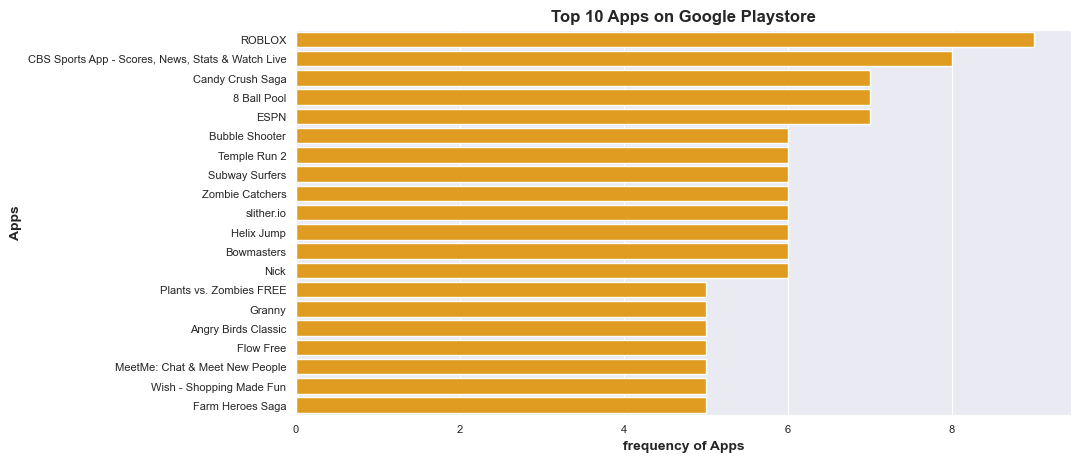

In [48]:
app=df_copy["App"].value_counts()[:20] #Top 20 apps on Google play stores
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.barplot(y=app.index , x=app.values , color="orange" )
plt.xlabel("frequency of Apps" ,fontweight="bold")
plt.ylabel("Apps" ,fontweight="bold")
plt.title("Top 10 Apps on Google Playstore" , fontweight="bold")



# **observation:**

***Users on Google playstore prefer apps like ROBLOX , CBS Sports , 8 ball pool like games . its means that most user prefer sports apps and games on google playstore.***

 **Lets check correlation between each numericals columns** 

Text(0.5, 1.0, 'Correlation between each columns')

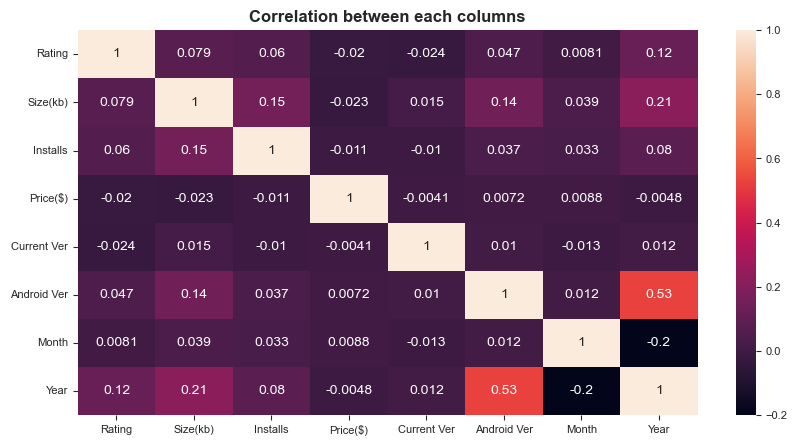

In [49]:
#lets check correlation , we get greater than 0.8 then i will remove it
num_corr = df[num_column].corr()
plt.figure(figsize=(10,5))
sns.set_style("ticks")
sns.heatmap(num_corr , annot=True ,linecolor= "black" )
plt.title("Correlation between each columns" , fontweight="bold")

In [50]:
df[num_column].describe()

,Rating,Size(kb),Installs,Price($),Current Ver,Android Ver,Month,Year
count,9476.000000,9476.000000,9.476000e+03,9476.000000,9.476000e+03,9476.000000,9476.000000,9476.000000
mean,4.177663,21521.895155,7.850907e+06,1.146005,1.316781e+03,3.866452,6.366927,2017.344133
std,0.496323,22139.202003,4.719512e+07,17.051204,2.155854e+04,0.837823,2.659760,1.138382
min,1.000000,8.500000,0.000000e+00,0.000000,0.000000e+00,1.000000,1.000000,2010.000000
25%,4.100000,5100.000000,1.000000e+03,0.000000,1.100000e+00,4.000000,5.000000,2017.000000
50%,4.200000,14000.000000,1.000000e+05,0.000000,1.900000e+00,4.100000,7.000000,2018.000000
75%,4.500000,29000.000000,1.000000e+06,0.000000,3.300000e+00,4.200000,8.000000,2018.000000
max,5.000000,100000.000000,1.000000e+09,400.000000,1.000001e+06,8.000000,12.000000,2018.000000


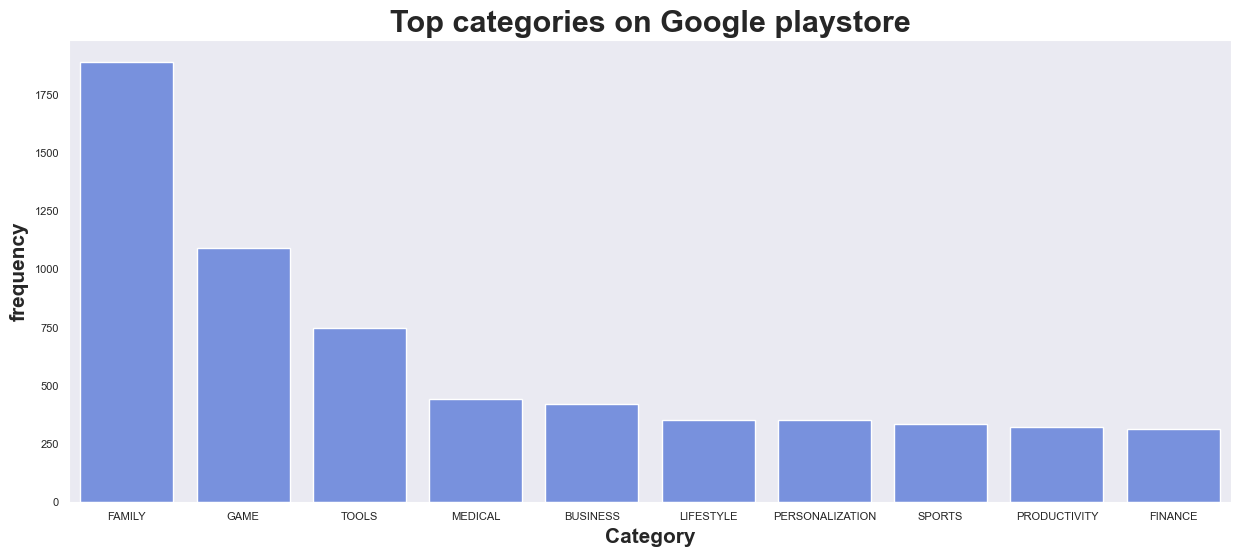

In [51]:
top_category = df_copy["Category"].value_counts().sort_values( ascending=False)[:10] #top 10 categories 
plt.figure(figsize=(15,6))
sns.set_palette("coolwarm")
sns.set_style("dark")
sns.barplot(x=top_category.index , y=top_category.values )
plt.xlabel("Category" , fontsize=15 ,fontweight="bold")
plt.ylabel("frequency" , fontsize=15 ,fontweight="bold")
plt.title("Top categories on Google playstore" ,fontsize=22 ,  fontweight="bold")
plt.show()


# **Observation**

***i: The most popular categories on the Play Store are Family , games and Tools.***

***ii: There are fewer categories related to lifestyle, personalization, sports, productivity, and finance.***

 **Performing group by opertion to see most installed app on Google Playstore**

In [52]:
app_install = df_copy.groupby("App")["Installs"].sum()
app_install = app_install.sort_values(ascending=False).head(11).reset_index() #top 10  app install 

In [53]:
import plotly.express as px
# Create the bar plot
fig = px.bar(app_install, 
             x='App', 
             y='Installs', 
             title="<b>Top 10 Apps by Number of Installs</b>",  # Bold title
             labels={'App':'App', 'Installs':'Total Installs'}, 
             color='App', 
             height=600)

# Update layout to make axis labels bold
fig.update_layout(
    xaxis_title="<b>App</b>",  # Bold x-axis label
    yaxis_title="<b>Total Installs</b>",  # Bold y-axis label
    font=dict(size=12)  # You can adjust the font size as well
)

# Show the plot
fig.show()


In [54]:
df_copy

,App,Category,Rating,Reviews,Size(kb),Installs,Type,Price($),Content Rating,Genres,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.00,4.0,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.00,4.0,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.20,4.0,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,1.90,4.2,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.10,4.4,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.000000,7,2600.0,500,Free,0.0,Everyone,Education,1.00,4.1,6,2017
10835,FR Forms,BUSINESS,4.177663,0,9600.0,10,Free,0.0,Everyone,Business,1.10,4.0,9,2016
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53000.0,5000,Free,0.0,Everyone,Education,1.48,4.1,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3600.0,100,Free,0.0,Everyone,Education,1.00,4.1,7,2018


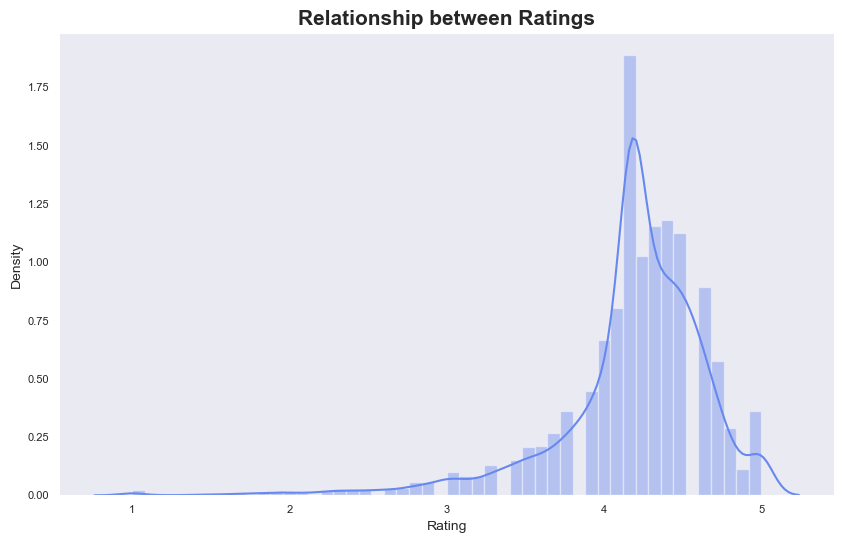

In [55]:
# Relationship between Ratings
plt.figure(figsize=(10, 6))
sns.distplot(df_copy['Rating'] , kde=True)
plt.title('Relationship between Ratings' , fontsize=15 , fontweight="bold")
plt.show()

In [56]:
#top genres 
top_genres = df_copy["Genres"].value_counts().sort_values(ascending=False)[:10]
fig=px.bar(x=top_genres.values , y=top_genres.index ,title="<b>Top Genres on Google Play Store", height=500)
fig.show()


**Average Rating by Category on Google Playstore**

In [57]:
#Based on  Mean , Highest and Lowest Rating by Category
low_avg_rating_cate= df_copy.groupby("Category")["Rating"].mean().sort_values(ascending=True)
high_avg_rating_cate= df_copy.groupby("Category")["Rating"].mean().sort_values(ascending=False)
print("Lowest Rating by Category" , low_avg_rating_cate[:10],"\nHighest Rating by Category" , high_avg_rating_cate[:10])
lowest_rating_cate=pd.DataFrame(low_avg_rating_cate )
lowest_rating_cate.rename(columns={"Rating":"Lowest_rating"}, inplace=True)
highest_rating_cate=pd.DataFrame(high_avg_rating_cate )
highest_rating_cate.rename(columns={"Rating":"Highest_rating"}, inplace=True)
print(lowest_rating_cate)
print(highest_rating_cate)



Lowest Rating by Category Category
DATING                 4.002833
MAPS_AND_NAVIGATION    4.022815
TOOLS                  4.035826
TRAVEL_AND_LOCAL       4.065755
VIDEO_PLAYERS          4.085070
LIFESTYLE              4.100578
FOOD_AND_DRINK         4.108181
FINANCE                4.120254
COMMUNICATION          4.131447
ENTERTAINMENT          4.131959
Name: Rating, dtype: float64 
Highest Rating by Category Category
EDUCATION              4.392849
EVENTS                 4.359221
ART_AND_DESIGN         4.348143
PERSONALIZATION        4.291263
BOOKS_AND_REFERENCE    4.286081
GAME                   4.278989
PARENTING              4.278537
BEAUTY                 4.271086
SOCIAL                 4.241446
WEATHER                4.225719
Name: Rating, dtype: float64
                     Lowest_rating
Category                          
DATING                    4.002833
MAPS_AND_NAVIGATION       4.022815
TOOLS                     4.035826
TRAVEL_AND_LOCAL          4.065755
VIDEO_PLAYERS       

# **Lets check best App with their Ratings and i will target Popular Categories**


In [58]:
family=df_copy[df_copy["Category"]=="FAMILY"]
low_rating_sort = family.sort_values(by="Rating" , ascending=True)
high_rating_sort = family.sort_values(by="Rating" , ascending=False)
low_family_rating = low_rating_sort.loc[: , ["Category" , "Rating"]]
high_family_rating=high_rating_sort.loc[: , ["Category" , "Rating"]]
print(">>\nLowest Family Rating " , low_family_rating.head(10))
print(">>\nHighest Family Rating " , high_family_rating.head(10))


>>
Lowest Family Rating        Category  Rating
10324   FAMILY     1.0
5978    FAMILY     1.0
4127    FAMILY     1.0
4905    FAMILY     1.6
6135    FAMILY     1.7
9176    FAMILY     1.7
4904    FAMILY     1.8
6812    FAMILY     1.8
9890    FAMILY     1.9
7416    FAMILY     1.9
>>
Highest Family Rating        Category  Rating
10837   FAMILY     5.0
6467    FAMILY     5.0
7623    FAMILY     5.0
9536    FAMILY     5.0
7482    FAMILY     5.0
7477    FAMILY     5.0
7442    FAMILY     5.0
7321    FAMILY     5.0
7320    FAMILY     5.0
7307    FAMILY     5.0


# **Observation:**

**by observing graph most installed app on play store are games.**

**There are also large no. of audience prefer google news and google duo for meeting.**

***There are some technicle tools like MS-office  and Word used  by most ny users , also larger no.of audience use UC browser and shareit for files transfer***

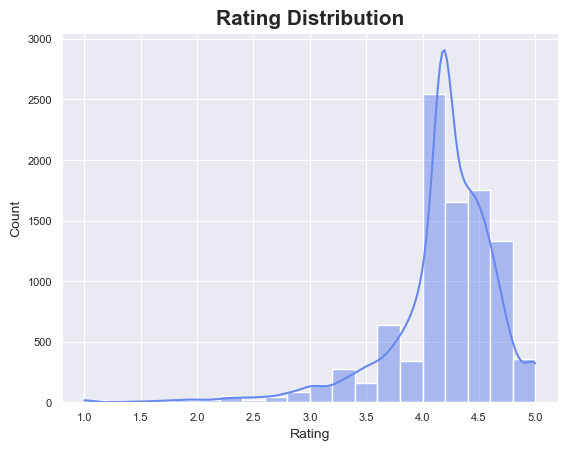

In [59]:
#Distribution of Ratings
sns.set_palette("coolwarm")
sns.set_style("darkgrid")
sns.histplot(df_copy['Rating'], bins=20, kde=True)
plt.title('Rating Distribution', fontsize=15 , fontweight="bold")
plt.show()

Text(0.5, 1.0, ' App Distribution')

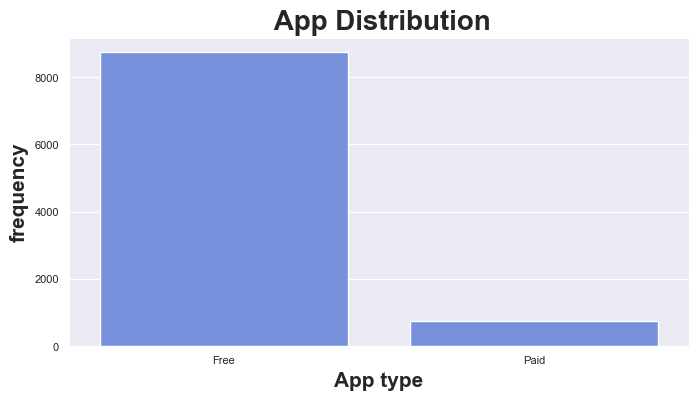

In [60]:
#Most App types on google Playstore
plt.figure(figsize=(8,4))
sns.set_palette("coolwarm")
sns.set_style("darkgrid")
sns.countplot(x=df_copy["Type"] )
plt.xlabel("App type" ,fontsize=15 , fontweight="bold")
plt.ylabel("frequency" ,fontsize=15 , fontweight="bold")
plt.title(" App Distribution" , fontsize=20 , fontweight="bold")

***Almost more than 90% percent apps on Google Playstore are free and remaining 5% percent paid***

# **Checking  Second Dataframe**

In [61]:
df1.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
5,10 Best Foods for You,Positive,1.00,0.300000


In [62]:
df1.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29692.000000,29692.000000
mean,0.188868,0.490930
std,0.355694,0.265976
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422917,0.652703
max,1.000000,1.000000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

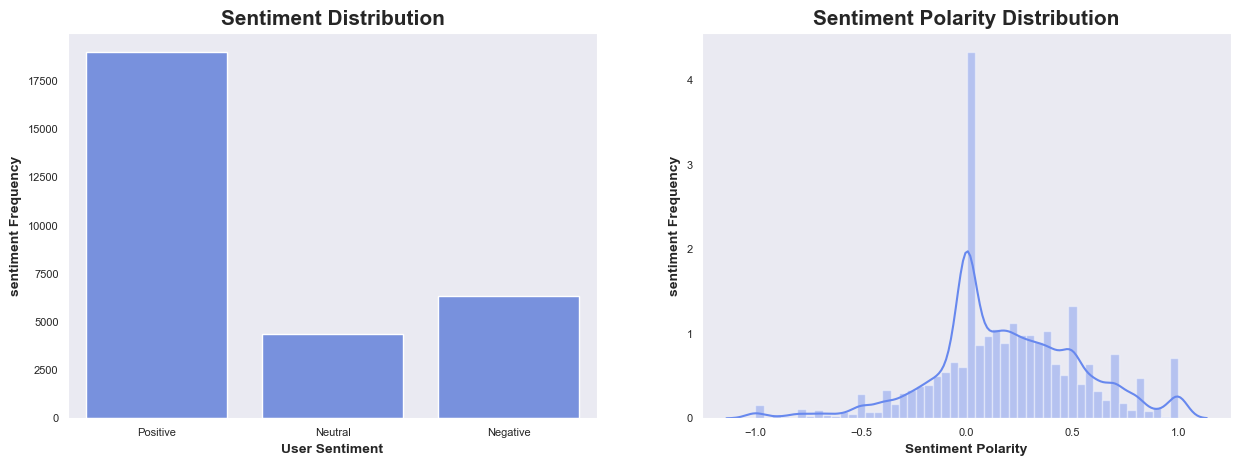

In [63]:
#User Sentiment on google Playstore
sns.set_style("dark")
fig , (ax1, ax2 ) = plt.subplots(1 ,2, figsize=(15,5))
sns.countplot(x=df1["Sentiment"] , ax=ax1) #Sentiment
ax1.set_xlabel("User Sentiment" , fontsize=10 , fontweight="bold")
ax1.set_ylabel("sentiment Frequency" , fontsize=10 , fontweight="bold")
ax1.set_title("Sentiment Distribution" , fontsize=15 , fontweight="bold")
sns.distplot(x=df1["Sentiment_Polarity"] , ax= ax2) #User Sentiment Polarity
ax2.set_xlabel("Sentiment Polarity" , fontsize=10 , fontweight="bold")
ax2.set_ylabel("sentiment Frequency" , fontsize=10 , fontweight="bold")
ax2.set_title("Sentiment Polarity Distribution" , fontsize=15 , fontweight="bold")

**Distribution is not normal beacause of Outliers**

# **Performing Merge Operation between two dataframes**

In [64]:
print("\n\n>>",df_copy.head(4))
print( "\n\n>>",df1.head(4))



>>                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   

  Reviews  Size(kb)  Installs  Type  Price($) Content Rating  \
0     159   19000.0     10000  Free       0.0       Everyone   
1     967   14000.0    500000  Free       0.0       Everyone   
2   87510    8700.0   5000000  Free       0.0       Everyone   
3  215644   25000.0  50000000  Free       0.0           Teen   

                      Genres  Current Ver  Android Ver  Month  Year  
0               Art & Design          1.0          4.0      1  2018  
1  Art & Design;Pretend Play          2.0          4.0      1  2018  
2               Art & Design          1.2          4.0      8  

In [65]:
df_merge =pd.merge(df_copy , df1 , on="App") #Based on Apps
df_merge.to_csv("dataset/google_data_merged.csv")


In [66]:
df_merge.head()

,App,Category,Rating,Reviews,Size(kb),Installs,Type,Price($),Content Rating,Genres,Current Ver,Android Ver,Month,Year,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0,4.0,1,2018,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0,4.0,1,2018,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0,4.0,1,2018,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0,4.0,1,2018,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0,4.0,1,2018,Negative,-0.800,0.900000


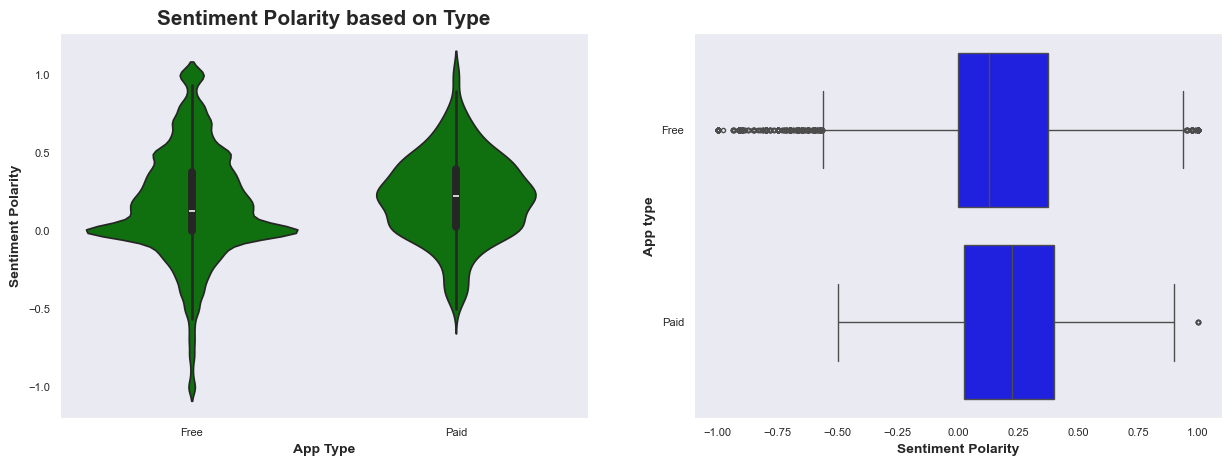

In [67]:
# Checking Sentiment Popularity Based on App type
fig , (ax1 , ax2) =plt.subplots(1,2 , figsize=(15,5))
sns.set_palette("coolwarm")
sns.set_style("whitegrid")
sns.violinplot(data=df_merge , x= "Type" , y="Sentiment_Polarity" , color="green" , ax=ax1)
ax1.set_xlabel("App Type" , fontsize=10 , fontweight="bold")
ax1.set_ylabel("Sentiment Polarity" , fontsize=10 , fontweight="bold")
ax1.set_title("Sentiment Polarity based on Type" , fontsize=15 , fontweight="bold")
sns.boxplot(data=df_merge , y="Type" , x="Sentiment_Polarity" , color="blue" , ax=ax2)
ax2.set_xlabel("Sentiment Polarity" , fontsize=10 , fontweight="bold")
ax2.set_ylabel("App type" , fontsize=10 , fontweight="bold")
plt.show()

***There are outliers near Lower Bound***

In [68]:
less_app_size= df_copy.groupby("App")["Size(kb)"].sum().sort_values(ascending=True)[:10] #top 10 Less app Sizes
higher_app_size=df_copy.groupby("App")["Size(kb)"].sum().sort_values(ascending=False)[:10] #top 10 high app Sizes
print("\n>>>> Lower",less_app_size)
print("\n>>>> Higher",higher_app_size)


>>>> Lower App
Essential Resources                                 8.5
Market Update Helper                               11.0
ExDialer PRO Key                                   17.0
Ad Remove Plugin for App2SD                        17.0
Private Dating, Hide App- Blue for PrivacyHider    18.0
Fill 'er Up                                        18.0
Morse Code Reader                                  20.0
Plugin:AOT v5.0                                    23.0
EM Launcher Pro                                    24.0
Bixby Button Remapper - bxActions Pro / Coffee     25.0
Name: Size(kb), dtype: float64

>>>> Higher App
ROBLOX                            603000.0
Candy Crush Saga                  518000.0
Angry Birds Classic               485000.0
Subway Surfers                    456000.0
Zombie Catchers                   450000.0
My Talking Angela                 396000.0
Clash of Clans                    392000.0
Clash Royale                      388000.0
DC Super Hero Girls™            

**Conclusion:**
**Apps with Higher sizes are Popular  because they provide better Graphics and Resourecs with Smoothness specially games and Tools**

In [69]:
df_copy

,App,Category,Rating,Reviews,Size(kb),Installs,Type,Price($),Content Rating,Genres,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.00,4.0,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.00,4.0,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.20,4.0,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,1.90,4.2,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.10,4.4,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.000000,7,2600.0,500,Free,0.0,Everyone,Education,1.00,4.1,6,2017
10835,FR Forms,BUSINESS,4.177663,0,9600.0,10,Free,0.0,Everyone,Business,1.10,4.0,9,2016
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53000.0,5000,Free,0.0,Everyone,Education,1.48,4.1,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3600.0,100,Free,0.0,Everyone,Education,1.00,4.1,7,2018


# **lets check Relation Between App , category and Price**

In [70]:
popular_cate=df_copy["Category"].value_counts().sort_values(ascending=False)[:10]
popular_cate #based on this Categories 


Category
FAMILY             1889
GAME               1088
TOOLS               744
MEDICAL             439
BUSINESS            419
LIFESTYLE           352
PERSONALIZATION     352
SPORTS              332
PRODUCTIVITY        319
FINANCE             313
Name: count, dtype: int64

In [71]:
most_pop_category = df_copy[df_copy["Category"].isin(["FAMILY" , "GAME" , "TOOLS" ,"MEDICAL", "BUSINESS","LIFESTYLE" , "PERSONALIZATION" , "SPORTS" ,"PRODUCTIVITY" ,"FINANCE"])]

Text(0.5, 1.0, 'App trends based on Each Categories')

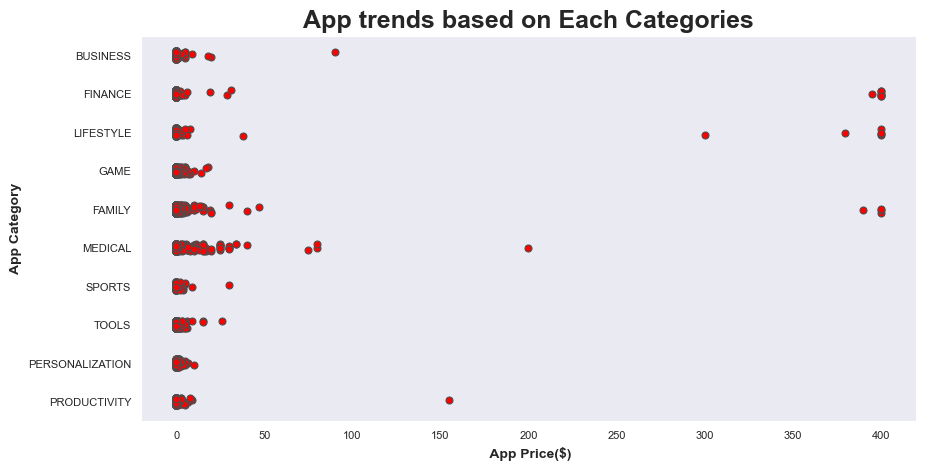

In [72]:
#ploting relation between Apps categories and Prices
plt.figure(figsize=(10,5))
sns.set_palette("coolwarm")
sns.set_style("dark")
sns.stripplot(x=most_pop_category["Price($)"] , y=most_pop_category["Category"] , jitter=True , linewidth=0.8 , color="red")
plt.xlabel(" App Price($)",fontsize=10 , fontweight="bold")
plt.ylabel("App Category" ,fontsize=10 , fontweight="bold")
plt.title("App trends based on Each Categories" , fontsize=18, fontweight="bold")

 **Lets check some junk app among Popular Category , if Price lesser than 50 dollar its junk App**

Text(0.5, 1.0, 'App trends after filtering Junk app Categories')

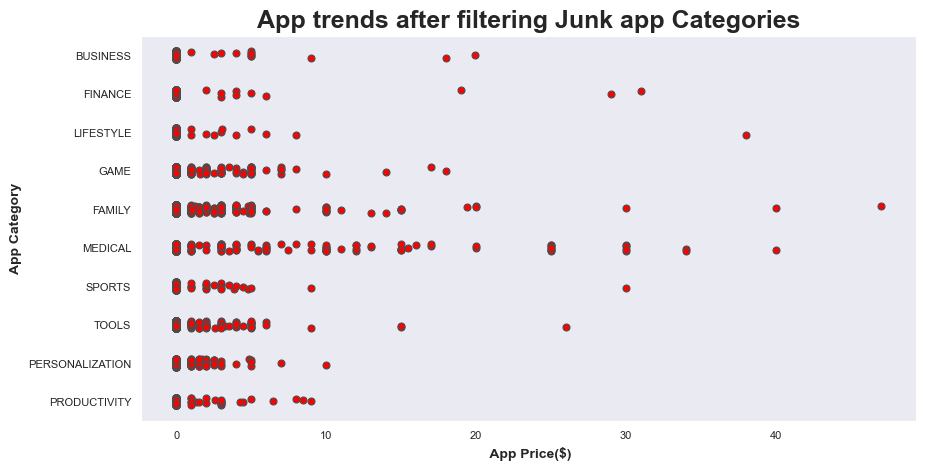

In [73]:
#Top 20 App Categories 
top_50_app_pop_categoy = most_pop_category[most_pop_category["Price($)"]<50]
plt.figure(figsize=(10,5))
sns.set_palette("coolwarm")
sns.set_style("dark")
sns.stripplot(x="Price($)" , y="Category" , jitter=True , linewidth=0.8 , color="red" , data=top_50_app_pop_categoy  )
plt.xlabel(" App Price($)",fontsize=10 , fontweight="bold")
plt.ylabel("App Category" ,fontsize=10 , fontweight="bold")
plt.title("App trends after filtering Junk app Categories" , fontsize=18, fontweight="bold")


# **Observing Users Sentiment Polarity of Top 20  Apps**

Text(0.5, 1.0, 'Top 20 Apps Sentiment Polarity')

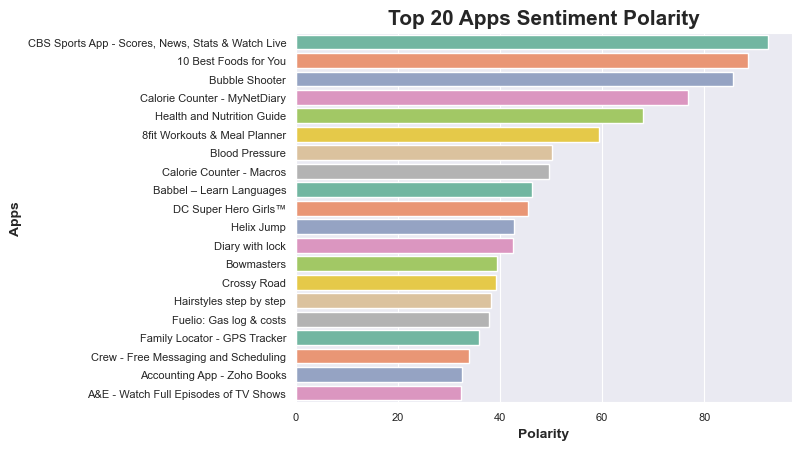

In [74]:
app_sentiment = df_merge.groupby("App")["Sentiment_Polarity"].sum().sort_values(ascending=False)[:20] #top 20 apps sentiment Polarity
plt.figure(figure=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=app_sentiment.index , x=app_sentiment.values , palette="Set2")
plt.xlabel("Polarity" ,fontsize=10 , fontweight="bold")
plt.ylabel("Apps" ,fontsize=10 , fontweight="bold")
plt.title("Top 20 Apps Sentiment Polarity" , fontsize=15 , fontweight="bold")

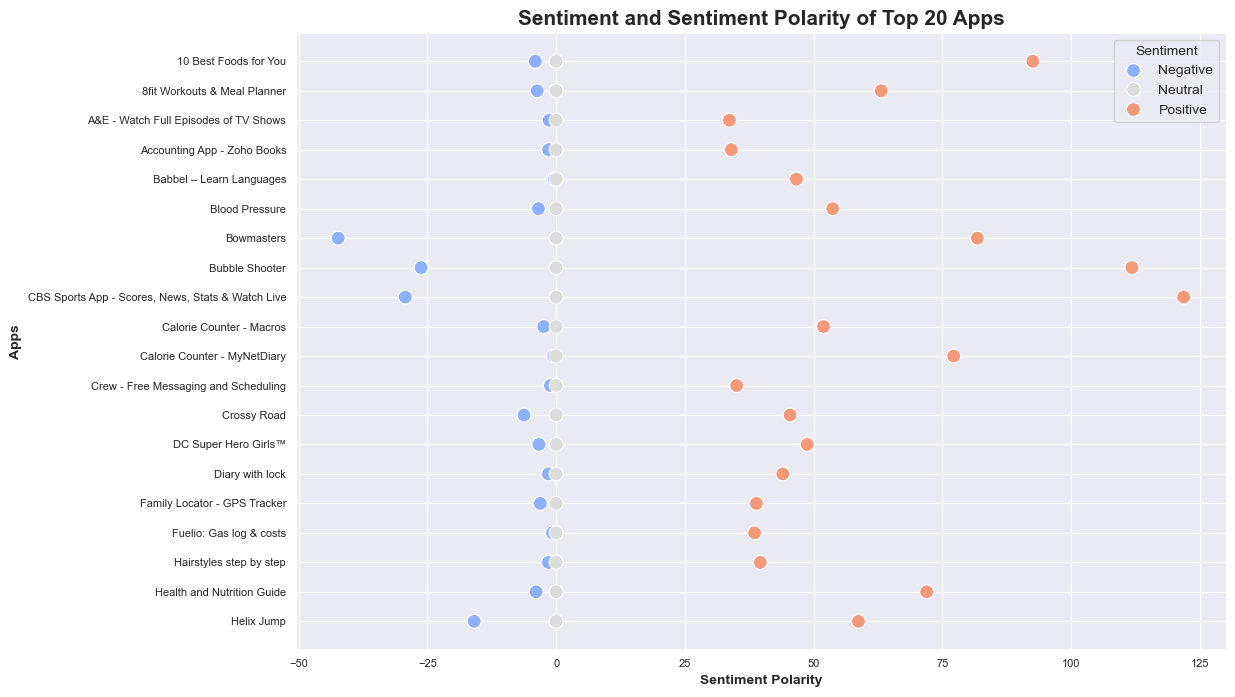

In [75]:
# Group the data by App and get sentiment and sentiment polarity
# Note: Assuming df_merge has columns "Sentiment" and "Sentiment_Polarity"
app_sentiment = df_merge.groupby(["App", "Sentiment"])["Sentiment_Polarity"].sum().reset_index()

# Get top 20 apps by sentiment polarity for each sentiment category
top_20_apps_sentiment = app_sentiment.groupby('App')['Sentiment_Polarity'].sum().sort_values(ascending=False).index[:20]
filtered_df = app_sentiment[app_sentiment['App'].isin(top_20_apps_sentiment)]

# Set up the figure size
plt.figure(figsize=(12,8))

# Use a dark grid style for the background
sns.set_style("darkgrid")

# Create a scatterplot for sentiment and sentiment polarity of the top 20 apps
sns.scatterplot(x='Sentiment_Polarity', y='App', hue='Sentiment', data=filtered_df, palette="coolwarm", s=100)

# Adding labels and title
plt.xlabel("Sentiment Polarity", fontsize=10, fontweight="bold")
plt.ylabel("Apps", fontsize=10, fontweight="bold")
plt.title("Sentiment and Sentiment Polarity of Top 20 Apps", fontsize=15, fontweight="bold")

# Display the plot
plt.show()


# **EDA Summary**

## **Overview of the Data**
The first step is to get a feel for the data's structure. In the Google Play Store dataset, we have information about apps, including their category, rating, number of reviews, size, and installs. The second dataset focuses on user reviews and the sentiment (positive, negative, or neutral).

- **What we learned**: The datasets are large and contain valuable information about both apps and user feedback. No major structural issues were found in this step.

## **Cleaning the Data**
Before analysis, we clean the data by checking for missing values, ensuring the correct data types, and removing any duplicate entries.

- **What we learned**:
  - Some apps are missing ratings, and we need to decide how to handle these missing values.
  - The "Installs" and "Price" columns need to be cleaned and converted to numeric formats for proper analysis.

## **Summary Statistics**
We check basic statistics like the average rating, number of reviews, and app prices.

- **What we learned**:
  - Most apps have high ratings (around 4.0 and above).
  - The number of reviews is uneven, with a few apps having millions of reviews and many having very few.
  - Most apps are free, but the few paid apps vary widely in price.

## **Exploring App Categories**
Next, we examine the distribution of apps across different categories (e.g., games, productivity, family).

- **What we learned**: 
  - Certain categories like "Games" and "Family" have many apps, but these categories differ in terms of popularity and ratings.
  - Visualizing this with bar charts or pie charts shows the dominance of certain app categories.

## **Looking at Ratings**
We analyze the distribution of app ratings to identify any patterns or trends.

- **What we learned**:
  - Most apps are rated highly, but some have notably lower ratings. These apps might have issues that require attention.
  - A histogram of ratings shows that most apps fall into the 4.0+ rating range.

## **Finding Relationships Between Features**
We explore whether there are correlations between key features like installs, reviews, app size, and ratings.

- **What we learned**:
  - Popular apps (with more installs) tend to have more reviews and higher ratings.
  - A correlation heatmap helps visualize the strength of these relationships.

## **Exploring User Sentiment (from Reviews)**
The second dataset contains user reviews, labeled as positive, negative, or neutral. This gives us deeper insights into user opinions beyond just ratings.

- **What we learned**:
  - Most reviews are positive, but there are some negative ones that could point to areas of improvement for certain apps.
  - A word cloud or bar plot can help visualize the most common words or sentiment counts.

## **Comparing Ratings and Reviews**
We analyze whether the sentiment of user reviews matches the app ratings.

- **What we learned**:
  - Apps with higher ratings tend to have more positive reviews, but there are exceptions where highly-rated apps still receive negative feedback.
  - A scatter plot can show how closely ratings and review sentiments align.

---

## **Key Takeaways**
1. **High ratings**: Most apps are rated highly, but ratings alone might not reveal all issues.
2. **Category differences**: Popular categories like "Games" and "Family" have a large number of apps and installs.
3. **User reviews**: Positive reviews are common, but negative reviews provide valuable feedback for app improvements.
4. **Relationships**: Popular apps often have better ratings and more reviews, indicating user engagement.

In summary, the EDA gives us a broad understanding of the Google Play Store landscape and helps highlight areas where app developers could improve based on user feedback.
